# TP3 DataViz - MSD ISOMAP

Trouver une nouvelle représentation Y= {Y1,Y2, ..., Ym}
en dimension d de l’ensemble de points X ={X1,X2,...,Xm}
en dimension n, (d<n>) , de telle sorte que les proximités entre points soient
conservées.

Le positionnement recherché minimise une fonction de coût S(Y1,y2,...,Ym) qu’on appelle le Stress

On va chercher à faire une ACP, mais uniquement en se basant sur les distance entre les points (pas les caractéristiques).

In [314]:
import sklearn.manifold as mn
from sklearn import datasets
import matplotlib.pyplot as plt


In [315]:
import numpy as np

### 1) Les données

In [316]:
titre ='IRIS'
iris = datasets.load_iris()
X = iris.data  
y = iris.target
N = X.shape[0]
n_components = 2
n_neighbors = 4

### Etape 1 : construire un graphe des voisins, déterminer les kPPV de chaque point Xi

1.1) chaque nœud est connecté à ses kPPV

In [317]:
from sklearn.neighbors import kneighbors_graph

In [318]:
kng = kneighbors_graph(X, n_neighbors,mode='distance')

In [319]:
kng

<150x150 sparse matrix of type '<class 'numpy.float64'>'
	with 600 stored elements in Compressed Sparse Row format>

In [320]:
print(kng)

  (0, 17)	0.09999999999999998
  (0, 4)	0.1414213562373093
  (0, 39)	0.14142135623730964
  (0, 27)	0.14142135623730995
  (1, 34)	0.14142135623730964
  (1, 45)	0.14142135623730986
  (1, 12)	0.1414213562373099
  (1, 9)	0.17320508075688784
  (2, 47)	0.14142135623730978
  (2, 3)	0.24494897427831802
  (2, 12)	0.264575131106459
  (2, 6)	0.264575131106459
  (3, 47)	0.14142135623730964
  (3, 29)	0.17320508075688812
  (3, 30)	0.22360679774997916
  (3, 2)	0.24494897427831802
  (4, 37)	0.14142135623730925
  (4, 0)	0.1414213562373093
  (4, 17)	0.17320508075688756
  (4, 40)	0.17320508075688767
  (5, 18)	0.33166247903553986
  (5, 10)	0.3464101615137753
  (5, 48)	0.36055512754639896
  (5, 44)	0.3741657386773947
  (6, 47)	0.22360679774997871
  :	:
  (143, 140)	0.346410161513776
  (144, 140)	0.24494897427831785
  (144, 120)	0.30000000000000016
  (144, 143)	0.31622776601683794
  (144, 124)	0.3999999999999999
  (145, 141)	0.24494897427831822
  (145, 147)	0.3605551275463989
  (145, 139)	0.360555127546399
 

In [321]:
# kng[i, j] distance entre exemple i et exemple j. 
kng[0,1]

0.0

1.2) les arrêtes de poids non-nuls prennent comme valeur la distance euclidienne entre
les 2 nœuds

In [187]:
kng.indices

array([ 17,   4,  39,  27,  34,  45,  12,   9,  47,   3,  12,   6,  47,
        29,  30,   2,  37,   0,  17,  40,  18,  10,  48,  44,  47,   2,
        11,  42,  39,  49,   0,  17,  38,   3,  42,  13,  34,   1,  30,
        12,  48,  27,  36,  19,  29,   7,  26,  24,   1,   9,  45,  34,
        38,  42,   8,  47,  33,  16,  15,  18,  33,  14,   5,  16,  10,
        48,  33,  19,   0,  40,   4,  39,   5,  10,  48,  20,  21,  46,
        48,   4,  31,  27,  28,  10,  19,  46,  17,   4,   6,   2,  37,
        40,  26,  43,  39,   7,  11,  29,  26,  30,  34,   9,   1,  30,
        23,  43,   7,  39,  28,   0,  39,  17,  27,   0,  39,  17,  30,
         3,  11,  47,  29,  34,   9,  25,  20,  28,  27,  36,  46,  33,
        19,  48,  32,  15,  16,  14,   9,   1,  30,  25,  49,   1,   2,
        40,  10,  31,  28,  48,   4,   0,  40,   7,   8,  42,  13,   3,
         7,   0,  28,  27,  17,   0,   4,   7,   8,  38,  45,  13,  38,
        47,   3,   2,  26,  23,  21,  17,  46,   5,  21,  19,   

### Etape 2 : déterminer les distance "géodésique" entre tous les points. 

Trouvons les distances dij = d(Xi,Xj), les distances (dissimilarité) entre les points Xi et Xj dans l’espace de départ.

In [346]:
def distance_matrix(X):
    l = len(X)
    D = np.zeros((l, l))
    
    for i in range(len(X)):
        for j in range(len(X)):
            D[i, j] = distance.euclidean(X[i], X[j])**2
    return D

In [323]:
from scipy.spatial import distance

pour tous les points, déterminer leur distance "géodésique" comme le plus court
chemin sur le graphe (algo. de Floyd algo. de Dijkstra)

In [325]:
from sklearn.utils.graph import graph_shortest_path

In [326]:
# je symétrise
kng = 0.5 * (kng+kng.T)

In [327]:
dist_matrix = graph_shortest_path(kng,directed=False)

In [328]:
dist_matrix.shape

(150, 150)

In [329]:
dist_matrix

array([[0.        , 0.40243378, 0.41054766, ..., 0.        , 0.        ,
        0.        ],
       [0.40243378, 0.        , 0.27370892, ..., 0.        , 0.        ,
        0.        ],
       [0.41054766, 0.27370892, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.3082207 ,
        1.14354373],
       [0.        , 0.        , 0.        , ..., 0.3082207 , 0.        ,
        1.45176443],
       [0.        , 0.        , 0.        , ..., 1.14354373, 1.45176443,
        0.        ]])

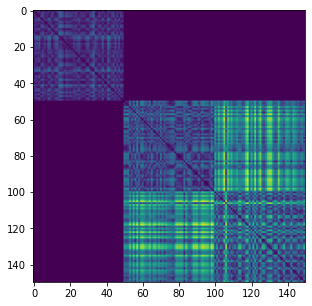

In [332]:
plt.figure(figsize=(5,5))
plt.imshow(dist_matrix)

### Etape 3 : construire l'embedding de basse dimension à partir des distances géodésiques

3.1) Multi-Dimensionnal Scaling

3.2) Passer en similarité

In [333]:
def B_matrix(D):
    M = len(D)
    In = np.eye(M, M)
    one = np.ones(M)    
    B = -1/2 * (In - (1/M * one @ one.T)) @ D**2 @ (In - (1/M * one @ one.T))
    return B

In [334]:
B = B_matrix(dist_matrix)

In [335]:
B.shape

(150, 150)

In [336]:
B

array([[-13618.57997342, -13615.06150194, -13615.50127554, ...,
        -13551.30668711, -13524.92702961, -13529.23530402],
       [-13615.06150194, -13611.38107752, -13611.85501119, ...,
        -13547.70723915, -13521.32758166, -13525.63585607],
       [-13615.50127554, -13611.85501119, -13612.25402828, ...,
        -13548.14371454, -13521.76405704, -13526.07233146],
       ...,
       [-13551.30668711, -13547.70723915, -13548.14371454, ...,
        -13484.03340079, -13457.70124329, -13462.61586384],
       [-13524.92702961, -13521.32758166, -13521.76405704, ...,
        -13457.70124329, -13431.27408579, -13436.63617019],
       [-13529.23530402, -13525.63585607, -13526.07233146, ...,
        -13462.61586384, -13436.63617019, -13439.89063463]])

In [337]:
from scipy.linalg import eigh

In [338]:
def vec_prop(B):
    eig_vals, eig_vecs = eigh(B) #eigh(B)#np.linalg.eigh(B)
    eig_vals =  eig_vals.reshape((-1,1))
    return  eig_vals, eig_vecs  #eig_vecs[:,-1], eig_vecs[:,-2], eig_vals[-1], eig_vals[-2] #eig_vals, eig_vecs#

In [339]:
#vp1, vp2, l1, l2 = vec_prop(B)
l, vp = vec_prop(B)

In [381]:
def print_Y_iso(v,Vp):
    '''
    Vp : vecteur propre
    v = l : valeur propre
    '''
    l = v[-2:]
    Y_iso = np.fliplr(Vp[:,-2:]@np.diag([l[0,0],l[1,0]]))
    fig, ax = plt.subplots()
    scatter = ax.scatter(Y_iso[:,0], Y_iso[:,1], c=y[0:N], cmap=plt.cm.Set1)
    legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title=titre)
    ax.add_artist(legend1)

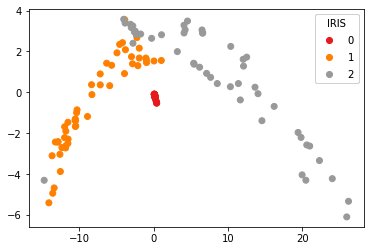

In [382]:
print_Y_iso(l,vp)

### Test de notre fonciton MDS from scratch :

In [383]:
def MDS_Isomap(X, n_neighbors, n_components):
    '''
    X :
    n_neighbors :
    n_components :
    '''

    # Etape 1
    kng = kneighbors_graph(X, n_neighbors,mode='distance')
        
    # je symétrise
    kng = 0.5 * (kng+kng.T)
    D = graph_shortest_path(kng,directed=False)
    #D = distance_matrix(X)
    plt.figure(figsize=(5,5))
    plt.imshow(D) 
    plt.colorbar()
    
    # Etape 2
    B = B_matrix(D)

    # Etape 3
    l, Vp = vec_prop(B)
    
    # Test :
    print_Y_iso(l,Vp)


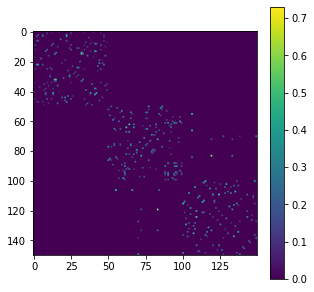

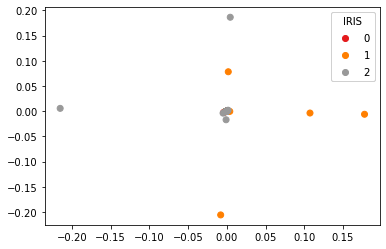

In [373]:
MDS_Isomap(X, 1, 2)

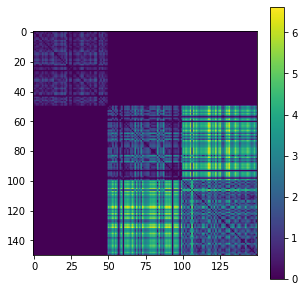

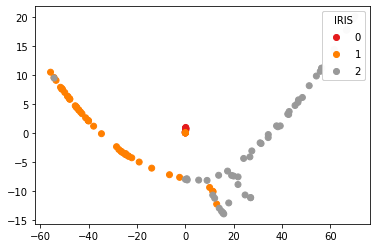

In [374]:
MDS_Isomap(X, 2, 2)

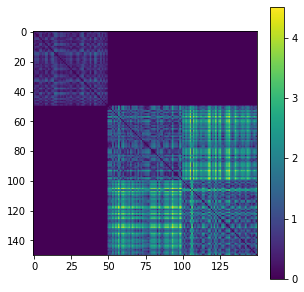

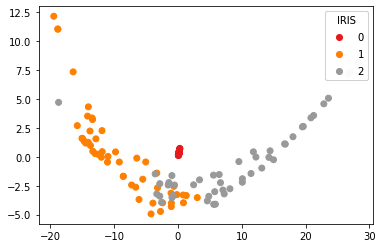

In [375]:
MDS_Isomap(X, 3, 2)

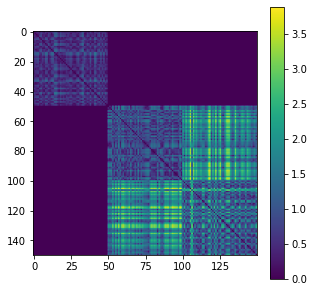

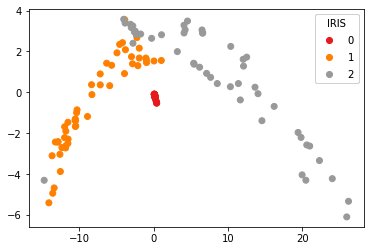

In [376]:
MDS_Isomap(X, 4, 2)

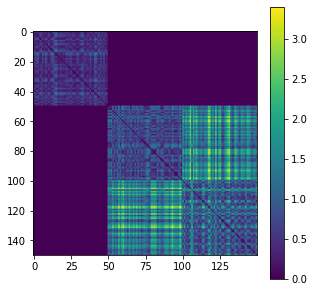

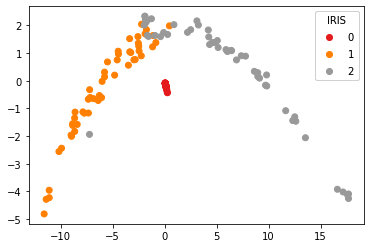

In [377]:
MDS_Isomap(X, 6, 2)

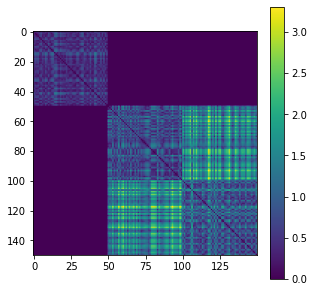

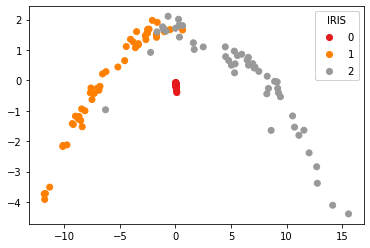

In [378]:
MDS_Isomap(X, 8, 2)

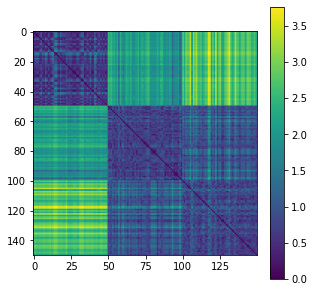

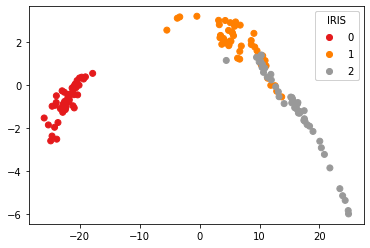

In [379]:
MDS_Isomap(X, 50, 2)

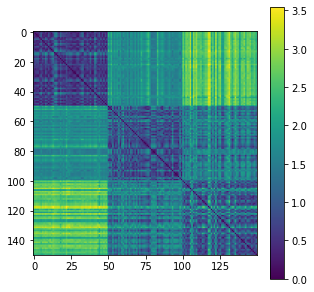

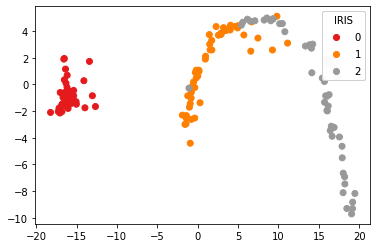

In [380]:
MDS_Isomap(X, 100, 2)

# Experiencence

Comparer votre résultat avec celui de scikitlearn

In [308]:
def get_X_iso_sklearn(n_neighbors,n_components):
    '''
    
    '''
    X_iso = mn.Isomap(n_neighbors, n_components, eigen_solver="dense",path_method="D").fit_transform(X)
    fig, ax = plt.subplots()
    scatter = ax.scatter(X_iso[:,0], X_iso[:,1], c=y[0:N], cmap=plt.cm.Set1)
    legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title=titre)
    ax.add_artist(legend1)
    return X_iso

/home/ketsia/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=1, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[ 2.55567998e-03,  1.93197235e-03],
       [ 2.40226126e-03,  1.80374483e-03],
       [ 2.41161210e-03,  2.08103335e-03],
       [ 2.41161210e-03,  2.08103335e-03],
       [ 2.62532516e-03,  1.99339939e-03],
       [ 2.49808274e-03,  1.88152043e-03],
       [ 2.23424187e-03,  1.68576625e-03],
       [ 2.45257768e-03,  1.84568051e-03],
       [ 2.80506066e-03,  3.84743870e-03],
       [ 2.14127468e-03,  1.57962558e-03],
       [ 2.42258719e-03,  1.82440557e-03],
       [ 2.34913450e-03,  1.75902750e-03],
       [ 2.01904881e-03,  1.47410766e-03],
       [ 3.89945758e-03,  9.51203544e-03],
       [ 1.37215625e-03,  9.36762663e-04],
       [ 1.55761428e-03,  1.11095330e-03],
       [ 1.77655976e-03,  1.26291585e-03],
       [ 2.61166996e-03,  1.98147156e-03],
       [ 2.49808274e-03,  1.88152043e-03],
       [ 2.36837786e-03,  1.78545242e-03],
       [ 2.53910391e-03,  1.91739144e-03],
       [ 2.13184354e-03,  1.58840998e-03],
       [-1.71767337e-04, -7.74720310e-04],
       [ 2.

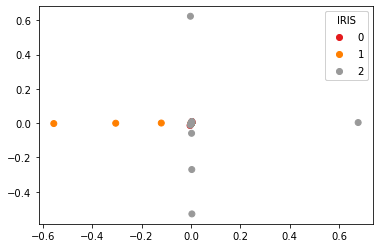

In [345]:
get_X_iso_sklearn(1,2)

/home/ketsia/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=2, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[ 0.09553006,  0.45425475],
       [ 0.09346332,  0.42066473],
       [ 0.09219368,  0.39721707],
       [ 0.09372248,  0.4251433 ],
       [ 0.09479092,  0.4408916 ],
       [ 0.09276097,  0.39548258],
       [ 0.09131137,  0.38095257],
       [ 0.09548998,  0.45524093],
       [ 0.09182721,  0.39031179],
       [ 0.0926488 ,  0.40621073],
       [ 0.09459761,  0.43279854],
       [ 0.09511349,  0.44947597],
       [ 0.09253748,  0.40389806],
       [ 0.08875266,  0.33318885],
       [ 0.08967891,  0.33223496],
       [ 0.0843447 ,  0.22398869],
       [ 0.09288715,  0.39876276],
       [ 0.09501602,  0.44496887],
       [ 0.09226784,  0.38706698],
       [ 0.08565834,  0.24956792],
       [ 0.09362324,  0.4179043 ],
       [ 0.08447872,  0.22597269],
       [ 0.08784624,  0.31643616],
       [ 0.09840151,  0.50285113],
       [ 0.09361735,  0.42277986],
       [ 0.09178613,  0.39058491],
       [ 0.09840283,  0.50288228],
       [ 0.09535612,  0.44976079],
       [ 0.09509056,

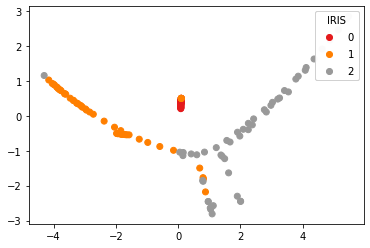

In [309]:
get_X_iso_sklearn(2,2)

/home/ketsia/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=4, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[ 1.39078251e-01, -3.81954936e-01],
       [ 1.34412499e-01, -3.30016680e-01],
       [ 1.34644841e-01, -3.33340361e-01],
       [ 1.34629671e-01, -3.32172175e-01],
       [ 1.38095677e-01, -3.69586395e-01],
       [ 1.29541698e-01, -2.65263282e-01],
       [ 1.35347865e-01, -3.41064506e-01],
       [ 1.39575240e-01, -3.88214306e-01],
       [ 1.28345693e-01, -2.58721925e-01],
       [ 1.32177729e-01, -3.06037299e-01],
       [ 1.35518154e-01, -3.36874434e-01],
       [ 1.38817909e-01, -3.80117816e-01],
       [ 1.32323705e-01, -3.06565868e-01],
       [ 1.22692526e-01, -1.93898580e-01],
       [ 1.17391730e-01, -1.17795865e-01],
       [ 1.12605386e-01, -5.93983495e-02],
       [ 1.30141686e-01, -2.71643982e-01],
       [ 1.38797618e-01, -3.78987228e-01],
       [ 1.27518728e-01, -2.41421019e-01],
       [ 1.35567375e-01, -3.37705671e-01],
       [ 1.34080891e-01, -3.23195196e-01],
       [ 1.36465214e-01, -3.49797799e-01],
       [ 1.32726759e-01, -3.10736368e-01],
       [ 1.

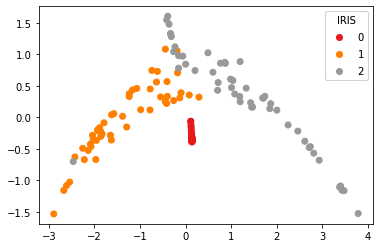

In [310]:
get_X_iso_sklearn(4,2)

/home/ketsia/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=3, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[ 9.56962438e-02,  4.37714297e-01],
       [ 9.24742471e-02,  3.84225131e-01],
       [ 9.26663955e-02,  3.87622467e-01],
       [ 9.30108635e-02,  3.93116666e-01],
       [ 9.43823778e-02,  4.17045994e-01],
       [ 8.95996782e-02,  3.34551872e-01],
       [ 9.34114677e-02,  4.00497723e-01],
       [ 9.60902681e-02,  4.44414306e-01],
       [ 8.90730316e-02,  3.26604378e-01],
       [ 9.12497351e-02,  3.65024661e-01],
       [ 9.36153881e-02,  4.00740371e-01],
       [ 9.56225310e-02,  4.36812301e-01],
       [ 9.11185178e-02,  3.61770758e-01],
       [ 8.38359505e-02,  2.39287131e-01],
       [ 8.14887794e-02,  1.92609714e-01],
       [ 7.85249031e-02,  1.41599127e-01],
       [ 8.99281459e-02,  3.37070013e-01],
       [ 9.49379716e-02,  4.25732426e-01],
       [ 8.81930825e-02,  3.10949676e-01],
       [ 9.22299650e-02,  3.78629999e-01],
       [ 9.22003526e-02,  3.80739489e-01],
       [ 9.32961673e-02,  3.97280357e-01],
       [ 9.07238504e-02,  3.56641834e-01],
       [ 9.

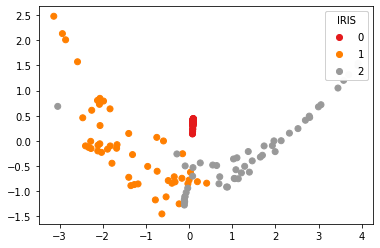

In [311]:
get_X_iso_sklearn(3,2)

/home/ketsia/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=6, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[ 0.11590102,  0.40171406],
       [ 0.11218557,  0.34874955],
       [ 0.11095503,  0.33054417],
       [ 0.11066562,  0.32675621],
       [ 0.11487492,  0.38746623],
       [ 0.10711396,  0.26455981],
       [ 0.11147882,  0.33925577],
       [ 0.11615988,  0.40652532],
       [ 0.10449741,  0.23445969],
       [ 0.11379453,  0.37233139],
       [ 0.11258047,  0.34783641],
       [ 0.11498844,  0.39053435],
       [ 0.11176225,  0.34213652],
       [ 0.09990338,  0.16527425],
       [ 0.09969974,  0.14881398],
       [ 0.09031297,  0.00355493],
       [ 0.10733568,  0.26736554],
       [ 0.11540425,  0.39521502],
       [ 0.10465764,  0.2268945 ],
       [ 0.11281133,  0.35338695],
       [ 0.11206976,  0.34355147],
       [ 0.11327317,  0.36093365],
       [ 0.10892893,  0.30087178],
       [ 0.11189543,  0.34742018],
       [ 0.11150063,  0.34220275],
       [ 0.11132132,  0.33754547],
       [ 0.11424498,  0.38110619],
       [ 0.11555697,  0.39521935],
       [ 0.11571121,

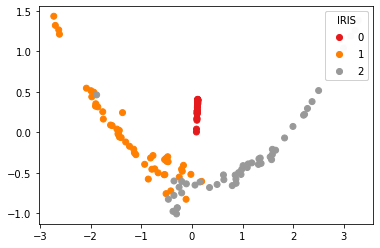

In [312]:
get_X_iso_sklearn(6,2)